<!-- BEGIN QUESTION -->
# [Bio 1B] Part A: Using Morphological Evidence to Make Hypotheses about Relationships

In [45]:
import pandas as pd
import numpy as np
from IPython.display import HTML
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed
from IPython.display import display
from IPython.display import clear_output

!pip install otter-grader -q
import otter
grader = otter.Notebook()

In [51]:
!pip install biopython
from Bio import Phylo
from Bio import SeqIO
for seq_record in SeqIO.parse("PrimatePhylogenetics_MorphologicalData.fasta.FASTA", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
print("\n")
for record in SeqIO.parse("PrimatePhylogenetics_MorphologicalData.fasta.FASTA", "fasta"):
    print(record.id)

Solenodon
Seq('000000000000')
12
Chimpanzee
Seq('111111111100')
12
Galago
Seq('100000000011')
12
Gibbon
Seq('101110011000')
12
Gorilla
Seq('111111111000')
12
Human
Seq('111111111100')
12
Lemur
Seq('100000000011')
12
Marmoset
Seq('101100011000')
12
Orangutan
Seq('101111111000')
12
Tarsier
Seq('100000001001')
12


Solenodon
Chimpanzee
Galago
Gibbon
Gorilla
Human
Lemur
Marmoset
Orangutan
Tarsier


In [48]:
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
import os

align = AlignIO.read("PrimatePhylogenetics_MorphologicalData.fasta.FASTA", "fasta")

calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(align)
print(distMatrix)

# Load the input data into a MultipleSeqAlignment object
alignment = AlignIO.read("PrimatePhylogenetics_MorphologicalData.fasta.FASTA", "fasta")

# Construct the phylogenetic tree using the Parsimony method
tree = Phylo.BaseTree.Tree(alignment)

Solenodon   0.000000
Chimpanzee  0.833333    0.000000
Galago  0.250000    0.916667    0.000000
Gibbon  0.500000    0.333333    0.583333    0.000000
Gorilla 0.750000    0.083333    0.833333    0.250000    0.000000
Human   0.833333    0.000000    0.916667    0.333333    0.083333    0.000000
Lemur   0.250000    0.916667    0.000000    0.583333    0.833333    0.916667    0.000000
Marmoset    0.416667    0.416667    0.500000    0.083333    0.333333    0.416667    0.500000    0.000000
Orangutan   0.666667    0.166667    0.750000    0.166667    0.083333    0.166667    0.750000    0.250000    0.000000
Tarsier 0.250000    0.750000    0.166667    0.416667    0.666667    0.750000    0.166667    0.333333    0.583333    0.000000
    Solenodon   Chimpanzee  Galago  Gibbon  Gorilla Human   Lemur   Marmoset    Orangutan   Tarsier


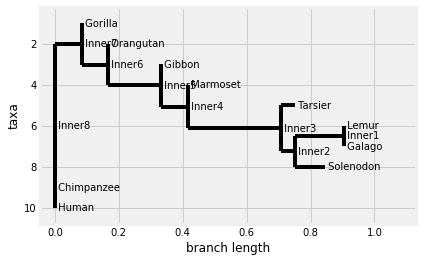

                                                         _____ Marmoset
                                         _______________|
                                        |               |_____ Gibbon
                                        |
  ______________________________________|                   ______ Orangutan
 |                                      |                __|
 |                                      |               |  |______ Gorilla
 |                                      |_______________|
 |                                                      |         , Human
_|                                                      |_________|
 |                                                                | Chimpanzee
 |
 |                                ____________ Tarsier
 |                          _____|
 |                         |     |            , Lemur
 |_________________________|     |____________|
                           |                  | Galago
                

In [49]:
constructor = DistanceTreeConstructor()
NJTree = constructor.nj(distMatrix) 
UGMATree = constructor.upgma(distMatrix)

Phylo.draw(NJTree)# Draw the phlyogenetic tree using terminal
Phylo.draw_ascii(UGMATree)